In [1]:
import pandas as pd
import numpy as np
import sidetable
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/netflix_originals.csv", index_col = 0)
df.head(2)

,years,genres,IMDB,runtime,description,stars,number of votes,type,original plataform
Titles,,,,,,,,,
Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


1️⃣ **Primer problema** La columna `titles` está en el índice. 


In [3]:
df.reset_index(inplace = True)
df.head(2)

,Titles,years,genres,IMDB,runtime,description,stars,number of votes,type,original plataform
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


Perfecto! Ya tenemos nuestra columna `titles` como parte de nuestro *dataframe* 

2️⃣ **Segundo problema** Estandarización del tipado de las columnas

In [4]:
df.columns

Index(['Titles', 'years                ', 'genres     ', 'IMDB', 'runtime',
       'description', 'stars', 'number of votes', 'type',
       'original plataform'],
      dtype='object')

In [5]:
nuevas_columnas = {col : col.lower().strip().replace(" ", "_") for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [6]:
df.columns

Index(['titles', 'years', 'genres', 'imdb', 'runtime', 'description', 'stars',
       'number_of_votes', 'type', 'original_plataform'],
      dtype='object')

3️⃣ **Tercer problema** La columna `number_of_votes` y `runtime` están en formato *string*. Debemos convertirlas a *integer* 

`number_of_votes`

In [7]:
df["number_of_votes"] = df["number_of_votes"].str.replace(",", "")

In [8]:
df.head(3)

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo",1779,TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...",5419,TV Show,Netflix


In [9]:
df['number_of_votes'] = pd.to_numeric(df["number_of_votes"], errors='coerce').astype('Int64')


In [10]:
df.number_of_votes.dtypes

Int64Dtype()

`runtime`

In [11]:
# vemos los valores únicos
df.runtime.unique()

array(['52 min', nan, '20 min', '45 min', '40 min', '44 min', '30 min',
       '11 min', '48 min', '60 min', '55 min', '50 min', '23 min',
       '22 min', '43 min', '66 min', '25 min', '26 min', '51 min',
       '46 min', '42 min', '629 min', '58 min', '53 min', '24 min',
       '41 min', '27 min', '31 min', '249 min', '15 min', '33 min',
       '39 min', '56 min', '37 min', '36 min', '7 min', '120 min',
       '12 min', '35 min', '28 min', '59 min', '49 min', '90 min',
       '70 min', '21 min', '16 min', '29 min', '47 min', '138 min',
       '18 min', '62 min', '542 min', '54 min', '14 min', '107 min',
       '280 min', '32 min', '34 min', '106 min', '111 min', '117 min',
       '92 min', '93 min', '102 min', '103 min', '88 min', '97 min',
       '82 min', '101 min', '86 min', '122 min', '100 min', '95 min',
       '113 min', '85 min', '112 min', '96 min', '104 min', '108 min',
       '116 min', '98 min', '125 min', '84 min', '115 min', '99 min',
       '134 min', '91 min', '129 min

In [12]:
# lo primero que tenemos que hacer es quitar "min" de nuestros valores. Para eso nos vamos a crear una función y usar un apply
def quitar_min(x): 
    if type(x) != float :
        return x.split()[0]
    else: 
        return x

In [13]:
# aplicamos la función

df["runtime"] = df["runtime"].apply(quitar_min)

In [14]:
df["runtime"].astype(int)

ValueError: cannot convert float NaN to integer

In [15]:
df["runtime"] = df["runtime"].fillna('0')

In [16]:
df["runtime"]= df["runtime"].astype(int)

In [17]:
df.dtypes

titles                 object
years                   int64
genres                 object
imdb                  float64
runtime                 int64
description            object
stars                  object
number_of_votes         Int64
type                   object
original_plataform     object
dtype: object

`year`

In [18]:
df["years"] = df["years"].astype("category")

In [19]:
df["years"].dtypes

CategoricalDtype(categories=[2001, 2003, 2004, 2007, 2008, 2009, 2011, 2012, 2013, 2014,
                  2015, 2016, 2017, 2018, 2019, 2020],
, ordered=False)

3️⃣ **Duplicados** 

In [20]:
df.duplicated().sum()

2

In [21]:
#identificamos nuestros valores duplicados:

df[df.duplicated() == True]

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
368,Kipo and the Age of Wonderbeasts,2020,"Animation, Action, Adventure",8.4,24,A girl explores the possibilities in a post-ap...,"Karen Fukuhara, Sydney Mikayla, Dee Bradley Ba...",2724,TV Show,Netflix
1199,Jo Koy: In His Elements,2020,Comedy,5.1,55,Jo Koy returns to the Philippines to show off ...,"Michael McKay, A, Fateeha, Joey Guila, Jo Koy",350,TV Show,Netflix


In [22]:
# comprobamos que hay un duplicado: 

df[df["titles"] == "Kipo and the Age of Wonderbeasts"]

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
367,Kipo and the Age of Wonderbeasts,2020,"Animation, Action, Adventure",8.4,24,A girl explores the possibilities in a post-ap...,"Karen Fukuhara, Sydney Mikayla, Dee Bradley Ba...",2724,TV Show,Netflix
368,Kipo and the Age of Wonderbeasts,2020,"Animation, Action, Adventure",8.4,24,A girl explores the possibilities in a post-ap...,"Karen Fukuhara, Sydney Mikayla, Dee Bradley Ba...",2724,TV Show,Netflix


¿Cómo los eliminamos? 

Usando el método `drop_duplcates()`

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
#chequeamos

df.duplicated().sum()

0

LLegados a este punto, debemos gestionar los nulos de nuestro *dataframe*

4️⃣ **Valores Nulos** 

Lo primero que tenemos que hacer es decidir si queremos o no quedarnos o no con esas filas. 

In [25]:
df.isnull().sum()

titles                 1
years                  0
genres                 1
imdb                   5
runtime                0
description            0
stars                 28
number_of_votes        1
type                   0
original_plataform     0
dtype: int64

¿Tiene sentido tener un nulo en la columna `titles`? En realidad no, ya que esto va de pelis. Lo que haremos será eliminar la fila correspondiente a ese nulo usando el método `dropna`

In [26]:
df.dropna(subset= ["titles"], inplace = True)

In [27]:
df.isnull().sum()

titles                 0
years                  0
genres                 1
imdb                   5
runtime                0
description            0
stars                 28
number_of_votes        1
type                   0
original_plataform     0
dtype: int64

Seguimos teniendo más nulos. ¿Qué hacemos con ellos? En caso de que queramos quedarnos con ellos, con que valor vamos a querer reemplazar esos nulos. Lo podremos hacer con: 

- Valor fijo como por ejemplo un 0 para variables númericas o una nueva etiqueta para variables categóricas como por ejemplo "Unknown". 


- Media 


- Mediana 


- Moda

Lo primero que tenemos que hacer en el caso de las variables numéricas es ver la distribución de los datos. Para eso podemos usar un `displot`

In [28]:
# sacamos las numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head()

,imdb,runtime,number_of_votes
0,6.9,52,1779
1,6.0,0,33
2,6.7,0,5419
3,6.7,20,1977
4,7.8,45,134932


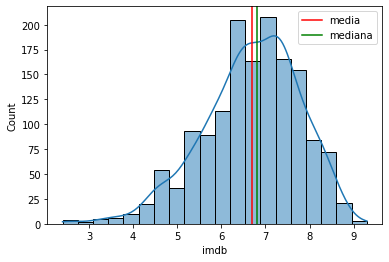

In [29]:
# plots imbd

media_imbd = numericas['imdb'].mean()
mediana_imbd = numericas['imdb'].median()
graf = sns.histplot(numericas['imdb'], bins = 20, kde = True)
graf.axvline(x=media_imbd, c="red", label="media")
graf.axvline(x=mediana_imbd, c="green", label="mediana")

plt.legend()
plt.show();

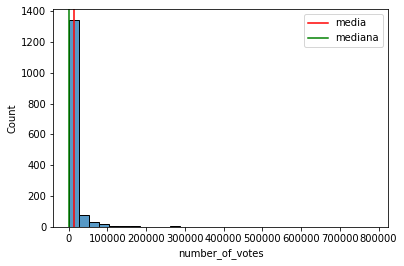

In [30]:
# plots number_of_votes

media_votes = numericas['number_of_votes'].mean()
mediana_votes = numericas['number_of_votes'].median()
graf = sns.histplot(numericas['number_of_votes'], bins = 30)
graf.axvline(x=media_votes, c="red", label="media")
graf.axvline(x=mediana_votes, c="green", label="mediana")

plt.legend()
plt.show();

Para `imbd`, en este caso la media y la mediana son similares y podríamos reemplazar por cualquier de ellos. 

In [31]:
df["imdb"] = df["imdb"].fillna(media_imbd)

Para `number_of_votes`, de nuevo la media y la mediana son similares y podríamos reemplazar por cualquier de ellos. 

In [32]:
df["number_of_votes"] = df["number_of_votes"].fillna(mediana_votes)

In [33]:
df.isnull().sum()

titles                 0
years                  0
genres                 1
imdb                   0
runtime                0
description            0
stars                 28
number_of_votes        0
type                   0
original_plataform     0
dtype: int64

Vamos con las categóricas: 

In [34]:
categoricas = df.select_dtypes(include = "object")
categoricas.head()

,titles,genres,description,stars,type,original_plataform
0,Zumbo's Just Desserts,Reality-TV,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo",TV Show,Netflix
1,Zona Rosa,Comedy,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",TV Show,Netflix
2,Young Wallander,"Crime, Drama, Mystery",Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...",TV Show,Netflix
3,You vs. Wild,"Adventure, Reality-TV","In this interactive series, you'll make key de...",Bear Grylls,TV Show,Netflix
4,You,"Crime, Drama, Romance","A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...",TV Show,Netflix


In [35]:
categoricas.isnull().sum()

titles                 0
genres                 1
description            0
stars                 28
type                   0
original_plataform     0
dtype: int64

`stars` En este caso lo que haremos será crear una etiqueta nueva para los valores nulos. 

In [36]:
df['stars'] = df['stars'].fillna("No-Info")

In [37]:
df.isnull().sum()

titles                0
years                 0
genres                1
imdb                  0
runtime               0
description           0
stars                 0
number_of_votes       0
type                  0
original_plataform    0
dtype: int64

`genres`

In [38]:
df['genres'] = df['genres'].fillna(df['genres'].mode()[0])

In [39]:
df.isnull().sum()

titles                0
years                 0
genres                0
imdb                  0
runtime               0
description           0
stars                 0
number_of_votes       0
type                  0
original_plataform    0
dtype: int64

Ya con nuestro dataframe limpito lo guardamos:

In [40]:
df.head(2)

,titles,years,genres,imdb,runtime,description,stars,number_of_votes,type,original_plataform
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo",1779,TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,0,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix


In [41]:
df.to_csv("data/netflix_originals_limpio.csv")

In [42]:
df.to_pickle("data/netflix_originals_limpio.pkl")